In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x = np.array([0.1, 0.2, 0.3]).reshape(3,1)
y = 3*x**2 - 2.5 *x + 1.

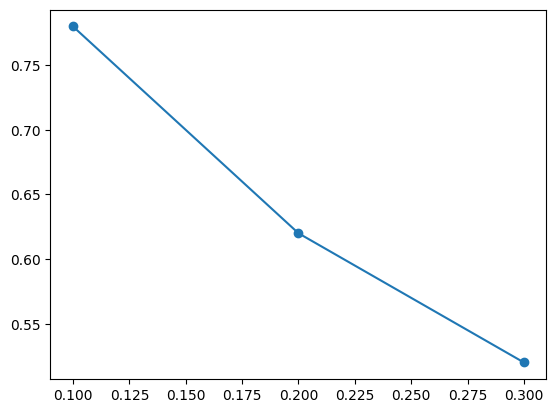

In [29]:
plt.plot(x, y, 'o-')
plt.show()

In [31]:
A = lambda x : np.hstack([np.ones((x.shape[0],1)), x, x**2 ])
print(A(x))

[[1.   0.1  0.01]
 [1.   0.2  0.04]
 [1.   0.3  0.09]]


Now what we will do is to solve

$$
\large
A u = y
$$

for the unknown coefficients $u$.

In [33]:
u = np.linalg.lstsq(A(x), y)

/var/folders/34/0177579s72zfk8k1ytk34_9c0346k7/T/ipykernel_51181/2643009379.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  u = np.linalg.lstsq(A(x), y)


In [34]:
print(u[0])

[[ 1. ]
 [-2.5]
 [ 3. ]]


In [37]:
xi = np.linspace(0.1, 0.4, 50).reshape(50, 1)
yi = A(xi) @ u[0]

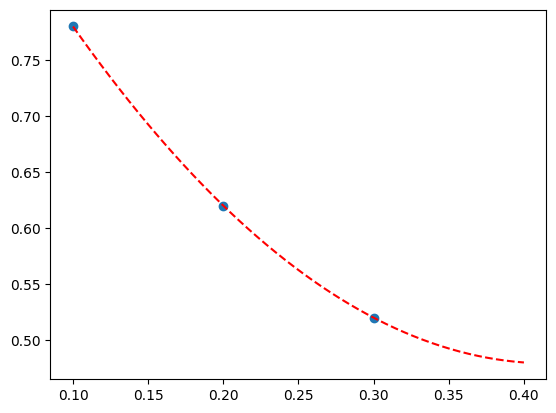

In [39]:
plt.plot(x, y, 'o')
plt.plot(xi, yi, 'r--')
plt.show()